### Dawid Weiss

### 406410

### Zadanie 3c

# Mean and standard deviation

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def p(k):
    if k == 0:
        return 1/2
    return 1/(abs(k)*(abs(k)+1)*(abs(k)+2))

Text(0, 0.5, 'P(Y = k)')

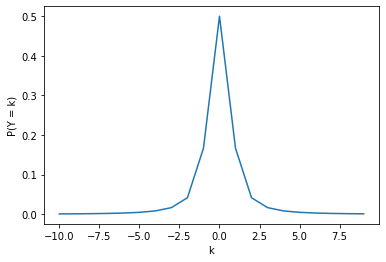

In [3]:
K = range (-10,10)
P = np.vectorize(p)(K)
plt.plot(K,P)
plt.xlabel("k")
plt.ylabel("P(Y = k)")

In [4]:
def sample():
    interval = random.randint(1, 4)
    if interval < 3:
        return 0;
    x = random.uniform(0, 1)
    k = np.floor(np.sqrt(2/x))
    if k < 1:
        k = 1
    while((k+1)*(k+2) < 2/x):
        k+=1
    if interval == 3:
        return -k
    return k

In [5]:
N = 10000
Y = [0]*N

for i in range(N):
    Y[i] = sample()

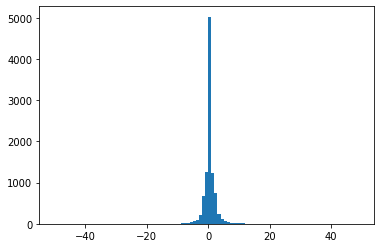

In [6]:
n_bins = 50
histogram = plt.hist(Y,bins = list(range(-n_bins,n_bins)))

In [7]:
Mean = [0]*N
prefix_sum = 0
for i in range(N):
    prefix_sum += Y[i]
    Mean[i] = prefix_sum/(i+1)

Text(0, 0.5, '( y1 + y2 + ... + yn ) / i')

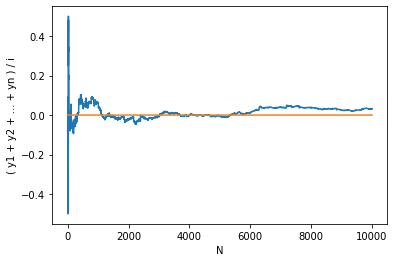

In [8]:
plt.plot(Mean)
plt.plot(N*[0]) 
plt.xlabel("N")
plt.ylabel("( y1 + y2 + ... + yn ) / i")

In [9]:
Median = [0]*N
Current_Y = []
for i in range(N):
    Current_Y.append(Y[i])
    Median[i] = np.median(Current_Y)

Text(0, 0.5, 'Mediana Y[1:N]')

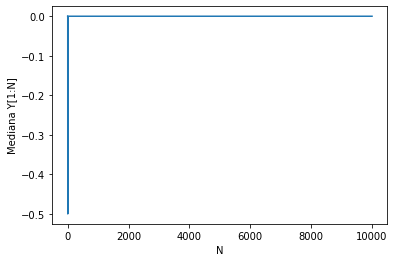

In [10]:
plt.plot(Median)
plt.xlabel("N")
plt.ylabel("Mediana Y[1:N]")